In [1]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
import pandas as pd
from scipy import stats
import numpy as np
#
from supports._setting import trips_dir
from supports._setting import DAY_OF_WEEK, TIME_SLOTS, CENT
from supports._setting import DInAP_PInAP, DInAP_POutAP, DOutAP_PInAP, DOutAP_POutAP
from supports.charts import multiple_line_chart
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
whole = pd.read_csv('%s/%s'%(trips_dir, 'whole-ap-tm-num-dur-fare_temp.csv'))
in_ap = whole[(whole['ap-trip-mode'] == DInAP_PInAP) | (whole['ap-trip-mode'] == DOutAP_PInAP)]
out_ap = whole[(whole['ap-trip-mode'] == DInAP_POutAP) | (whole['ap-trip-mode'] == DOutAP_POutAP)]
in_ap_gb = in_ap.groupby(['hh', 'day-of-week'])
out_ap_gb = out_ap.groupby(['hh', 'day-of-week'])

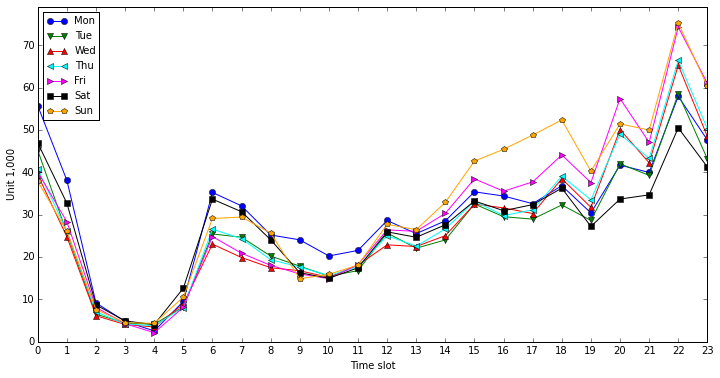

In [3]:
# Total number of in airport trips 
UNIT = 1000
hour_dow_totalNumTrip = in_ap_gb.sum()['num-tm'].to_frame('total-num-trip').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalNumTrip in hour_dow_totalNumTrip.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += totalNumTrip / UNIT
multiple_line_chart((12, 6), '', 'Time slot', 'Unit 1,000', 
                    (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'in_ap_num_trips')

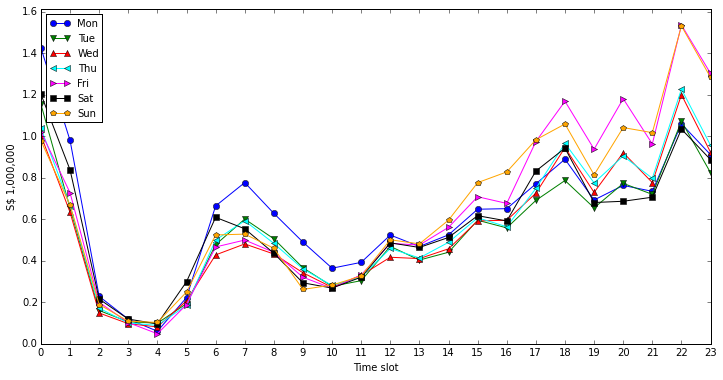

In [4]:
# Total fare of in airport trips
UNIT = 1000000
hour_dow_totalFare = in_ap_gb.sum()['total-fare'].to_frame('total-fare').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalFare in hour_dow_totalFare.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += (totalFare / CENT) / UNIT
multiple_line_chart((12, 6), '', 'Time slot', 'S$ 1,000,000', (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'in_ap_fare')

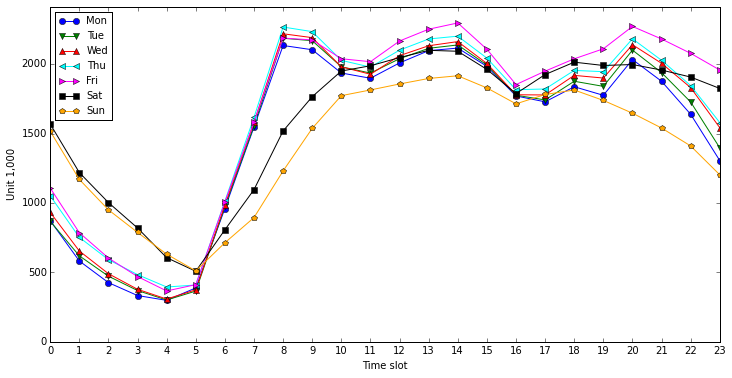

In [5]:
# Total number of out airport trips 
UNIT = 1000
hour_dow_totalNumTrip = out_ap_gb.sum()['num-tm'].to_frame('total-num-trip').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalNumTrip in hour_dow_totalNumTrip.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += totalNumTrip / UNIT
multiple_line_chart((12, 6), '', 'Time slot', 'Unit 1,000', 
                    (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'out_ap_num_trips')

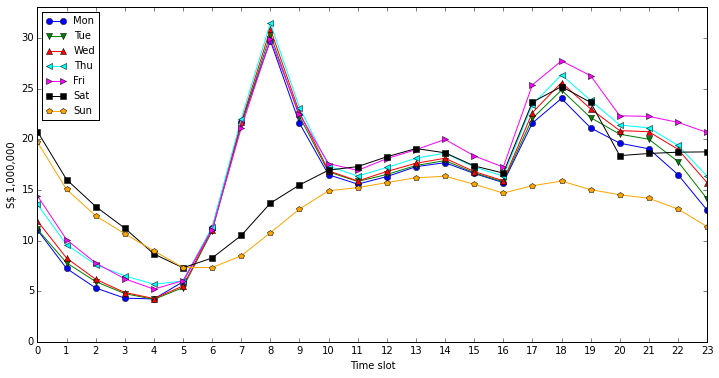

In [6]:
# Total fare of out airport trips
UNIT = 1000000
hour_dow_totalFare = out_ap_gb.sum()['total-fare'].to_frame('total-fare').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalFare in hour_dow_totalFare.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += (totalFare / CENT) / UNIT
multiple_line_chart((12, 6), '', 'Time slot', 'S$ 1,000,000', (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'out_ap_fare')